<a href="https://colab.research.google.com/github/Shafi233/Zomato-sales-analysis/blob/main/ZOMATO_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/content/Zomato_Orders_Dashboard_Data.csv")
df

,Order ID,Customer Name,City,Restaurant Name,Cuisine,Order Date,Order Time,Delivery Time,Payment Method,Total Amount,Food Rating,Delivery Status
0,ZMT0001,Regina Mullins,Bangalore,Burger Point,North Indian,2025-04-26,05:21:50,05:50:50,Cash,1014.24,5.0,Cancelled
1,ZMT0002,Steven Smith,Mumbai,Spicy Kitchen,North Indian,2025-05-02,10:23:16,10:51:16,Wallet,635.18,2.0,Late
2,ZMT0003,Monica Everett,Pune,Pizza Hub,Italian,2025-05-18,02:05:33,02:44:33,Credit Card,395.16,3.0,Cancelled
3,ZMT0004,Dale Campos,Hyderabad,Pizza Hub,Mexican,2025-04-25,16:15:42,16:58:42,Credit Card,407.75,1.0,Delivered
4,ZMT0005,Sara Walters,Hyderabad,Spicy Kitchen,South Indian,2025-05-26,16:54:02,17:22:02,Wallet,498.83,1.0,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ZMT0496,Brian Flores,Mumbai,Burger Point,North Indian,2025-05-18,18:13:42,19:07:42,Credit Card,834.66,2.0,Cancelled
496,ZMT0497,Alex Jimenez,Mumbai,Curry Leaf,Mexican,2025-06-05,04:10:58,05:01:58,Net Banking,1095.58,4.0,Late
497,ZMT0498,Keith Hernandez,Hyderabad,Tandoori House,Fast Food,2025-05-10,01:32:58,02:21:58,Net Banking,803.54,5.0,In Progress
498,ZMT0499,Donald Lam,Delhi,Wok Express,South Indian,2025-06-10,21:14:08,22:02:08,Net Banking,318.12,1.0,Late


In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.isna().sum()

,0
Order ID,0
Customer Name,0
City,0
Restaurant Name,0
Cuisine,0
Order Date,0
Order Time,0
Delivery Time,0
Payment Method,0
Total Amount,0


In [5]:
for i in df.isna().sum():
  print(i/len(df)*100 )

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
17.4
0.0


<Axes: xlabel='Food Rating'>

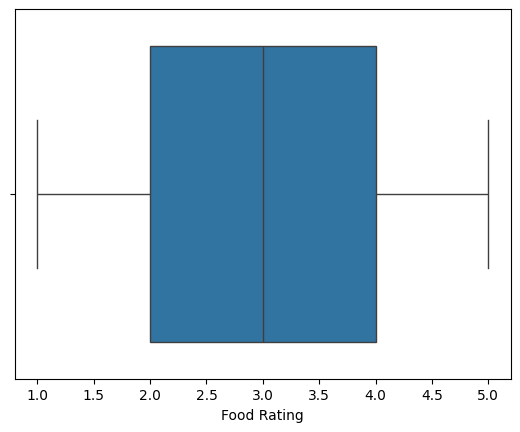

In [6]:
sns.boxplot(x="Food Rating",data=df)

In [7]:
m= df["Food Rating"].mean()
m

np.float64(3.079903147699758)

In [8]:
df['Food Rating'].fillna(m,inplace=True)

/tmp/ipython-input-8-3600727845.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Food Rating'].fillna(m,inplace=True)


In [9]:
df.isna().sum()

,0
Order ID,0
Customer Name,0
City,0
Restaurant Name,0
Cuisine,0
Order Date,0
Order Time,0
Delivery Time,0
Payment Method,0
Total Amount,0


In [10]:
df.head(3)

,Order ID,Customer Name,City,Restaurant Name,Cuisine,Order Date,Order Time,Delivery Time,Payment Method,Total Amount,Food Rating,Delivery Status
0,ZMT0001,Regina Mullins,Bangalore,Burger Point,North Indian,2025-04-26,05:21:50,05:50:50,Cash,1014.24,5.0,Cancelled
1,ZMT0002,Steven Smith,Mumbai,Spicy Kitchen,North Indian,2025-05-02,10:23:16,10:51:16,Wallet,635.18,2.0,Late
2,ZMT0003,Monica Everett,Pune,Pizza Hub,Italian,2025-05-18,02:05:33,02:44:33,Credit Card,395.16,3.0,Cancelled


In [24]:
top5_customers=(df.groupby("Customer Name")["Total Amount"].sum().sort_values(ascending=False).reset_index().head(5)).value_counts()

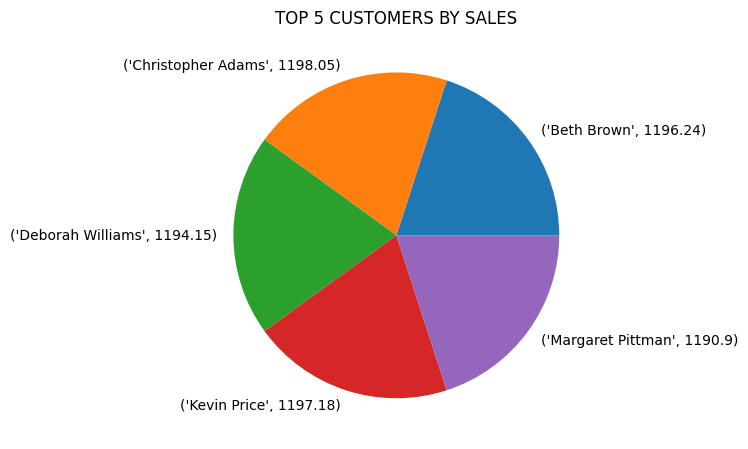

In [27]:
plt.pie(top5_customers,labels=top5_customers.index)
plt.title("TOP 5 CUSTOMERS BY SALES")
plt.tight_layout()
plt.show()

HERE WEE CAN SEE WHO ARE THE TOP 5 CUSTOMERS BY **SALES**


In [17]:
top5_resturant=(
    df.groupby("Restaurant Name")["Total Amount"].sum().sort_values(ascending=False).head(5).reset_index()

)

/tmp/ipython-input-21-3045457081.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Restaurant Name",y="Total Amount",data=top5_resturant,palette="Set2")


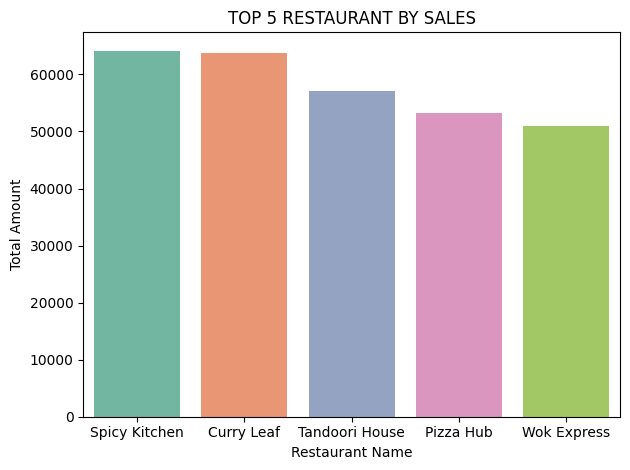

In [21]:
sns.barplot(x="Restaurant Name",y="Total Amount",data=top5_resturant,palette="Set2")
plt.title("TOP 5 RESTAURANT BY SALES")
plt.tight_layout()
plt.show()

HERE WE CAN SEE TOP 5 RESTURANT BY SALES bold text

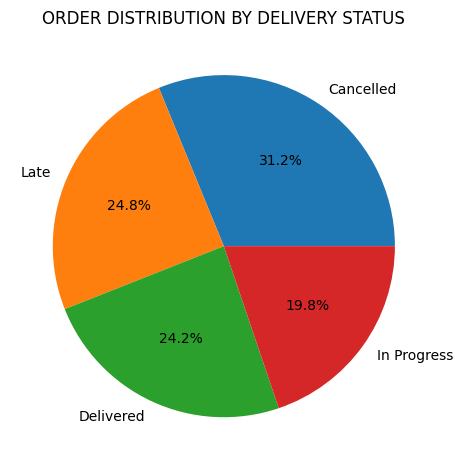

In [11]:
count_order=df['Delivery Status'].value_counts()
plt.pie(count_order,labels=count_order.index,autopct="%1.1f%%")
plt.title("ORDER DISTRIBUTION BY DELIVERY STATUS")
plt.tight_layout()
plt.show()

in this order status range deliverd is 24.2% ,canclleed are 31.2% high ration is cancelled order , order in progress are 19.8% and late order are 24.8%
**bold text**

/tmp/ipython-input-12-2052548709.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="City",y="Total Amount",data=df,ci=None,palette="Set2")
/tmp/ipython-input-12-2052548709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City",y="Total Amount",data=df,ci=None,palette="Set2")


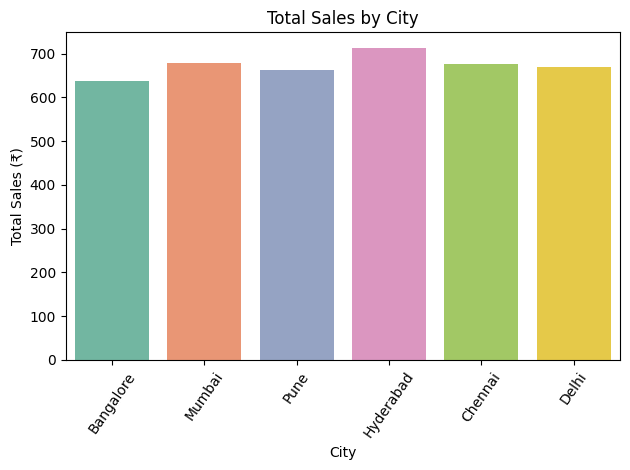

In [12]:
sns.barplot(x="City",y="Total Amount",data=df,ci=None,palette="Set2")
plt.title("Total Sales by City")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

HERE AS WE CAN SEE HYDERABAD IS CONTRIBUTING HISHEST SALES REST OF ALL OTHER CITY

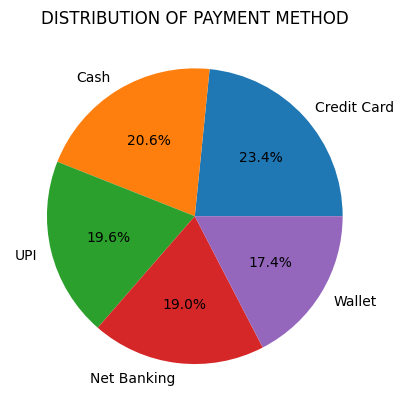

In [13]:
pay_count=df['Payment Method'].value_counts()
plt.pie(pay_count,labels=pay_count.index,autopct="%1.1f%%")
plt.title("DISTRIBUTION OF PAYMENT METHOD")
plt.show()


AS WE CAN SEE CREDIT CARD IS GIVING HIGHST **CONTRUBUTION**

/tmp/ipython-input-14-2562957460.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cuisine",y="Food Rating",data=df,ci=None,palette="Set2")
/tmp/ipython-input-14-2562957460.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cuisine",y="Food Rating",data=df,ci=None,palette="Set2")


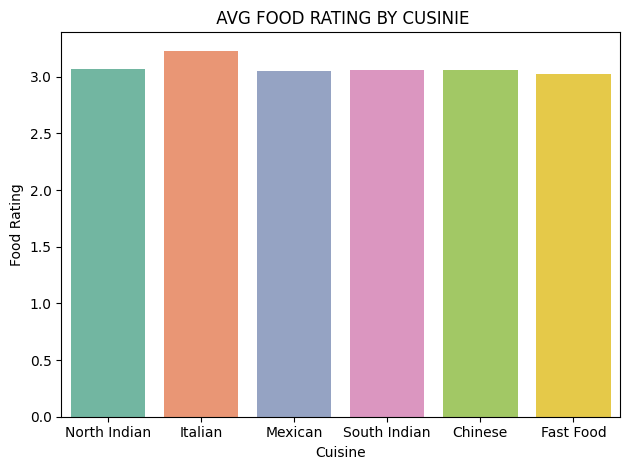

In [14]:
sns.barplot(x="Cuisine",y="Food Rating",data=df,ci=None,palette="Set2")
plt.title(" AVG FOOD RATING BY CUSINIE")
plt.tight_layout()
plt.show()

IN THIS BARCHART ITS GIVING CLEAR PICTURE OF AVG RATING BY CUSINE